In [8]:
# Vetores de Suporte
# Tracar uma linha reta a partir dos pontos encontrados

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
adm = pd.read_csv('Admission_Predict_Ver1.1.csv', index_col=0)

In [106]:
adm.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Classe
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [23]:
lista_colunas = []
for coluna in adm.columns:
    coluna = coluna.replace(' ','')
    lista_colunas.append(coluna)

In [32]:
adm.columns = lista_colunas

In [33]:
adm.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
mascara = adm.ChanceofAdmit > 0.80

In [35]:
adm.head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
classes = 1*mascara

In [37]:
adm['Classe'] = classes

In [41]:
adm.head(1)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Classe
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1


In [54]:
X = adm.drop(['ChanceofAdmit','Classe'], axis=1)
y = adm['Classe']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [56]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y)

In [57]:
modelo_svm = SVC()

In [58]:
modelo_svm.fit(X_treino, y_treino)

C:\Users\br003e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [60]:
from sklearn.metrics import accuracy_score, classification_report

In [61]:
from sklearn.preprocessing import Normalizer

In [65]:
normalizador = Normalizer()

In [67]:
X_n = normalizador.fit_transform(x)

In [68]:
X_n

array([[0.94325766, 0.33028013, 0.01119594, ..., 0.01259543, 0.0270102 ,
        0.00279898],
       [0.94902131, 0.31341136, 0.01171631, ..., 0.01318085, 0.02598092,
        0.00292908],
       [0.94947033, 0.3124839 , 0.00901396, ..., 0.01051629, 0.02403722,
        0.00300465],
       ...,
       [0.9391742 , 0.34151789, 0.01422991, ..., 0.01422991, 0.02720759,
        0.00284598],
       [0.94902966, 0.31330146, 0.01216705, ..., 0.01520881, 0.02564205,
        0.        ],
       [0.94461252, 0.32642573, 0.01155489, ..., 0.01299925, 0.02611406,
        0.        ]])

In [69]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_n,y)

In [70]:
modelo_svm = SVC()

In [71]:
modelo_svm.fit(X_treino, y_treino)

C:\Users\br003e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
from sklearn.metrics import accuracy_score, classification_report

In [80]:
y_pred = modelo_svm.predict(X_teste)

In [81]:
accuracy_score(y_teste, y_pred)

0.68

C:\Users\br003e\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


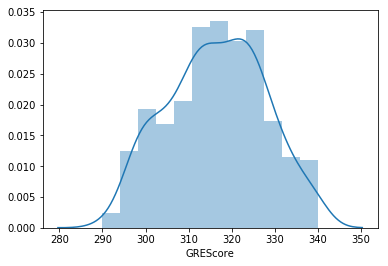

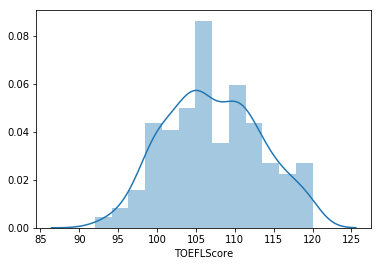

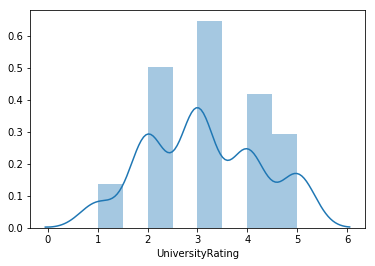

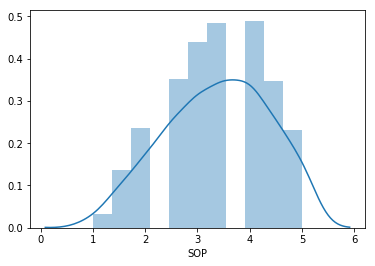

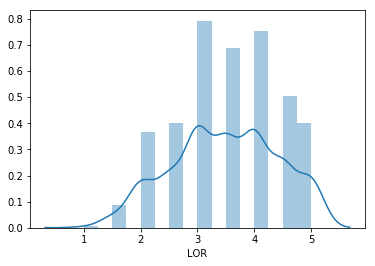

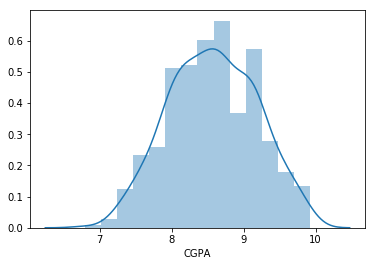

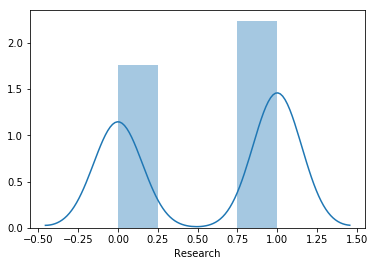

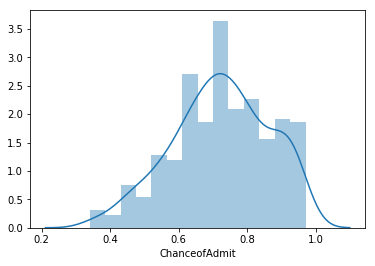

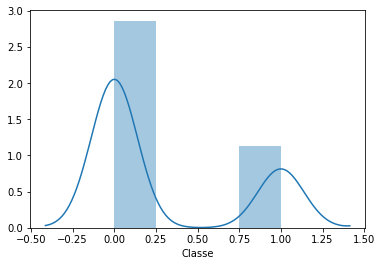

In [85]:
for coluna in adm.columns:
    fig = plt.figure()
    sns.distplot(adm[coluna])

In [88]:
adm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 9 columns):
GREScore            500 non-null int64
TOEFLScore          500 non-null int64
UniversityRating    500 non-null int64
SOP                 500 non-null float64
LOR                 500 non-null float64
CGPA                500 non-null float64
Research            500 non-null int64
ChanceofAdmit       500 non-null float64
Classe              500 non-null int32
dtypes: float64(4), int32(1), int64(4)
memory usage: 37.1 KB


In [102]:
adm2= adm.copy()

In [103]:
normalizador = Normalizer()

In [104]:
normalize()

NameError: name 'normalize' is not defined

In [97]:
normalize(adm[['GREScore','TOEFLScore','SOP', 'LOR', 'CGPA']], axis=0)

NameError: name 'normalize' is not defined